Niall Carbery #22380966 <p>
Maya Kamboj #22402726

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import *

## Question 1
In Tutorial 9 we found that the circuit presented in Fig. 1 generates one of the Bell’s states (one of
the maximally entangled states) at the output. How should the circuit be modified (what gates added
or changed) to generate the other three Bell’s states? Show the resulting unitary transform and the
output state vectors. Take the initial state |00⟩

In [ ]:
state_00 = np.array([[1],[0],[0],[0]])
X_gate = np.array([[0 ,1], [1, 0]])
Y_gate = np.array([[0 ,-1j], [1j, 0]])
Z_gate = np.array([[1 ,0], [0, -1]])
I_gate = np.array([[1 ,0], [0, 1]])
H_gate = (1/np.sqrt(2))*np.array([[1 ,1], [1, -1]])

cnot_gate = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])

backend = Aer.get_backend('unitary_simulator')
q = QuantumRegister(2,'q')

In [ ]:
circuit = QuantumCircuit(q)

circuit.x(q[0]) # Pauli-X gate
circuit.h(q[0]) # Hadamard gate
circuit.cx(q[0],q[1]) # CNOT gate

print(circuit)
circuit = transpile(circuit, backend=backend)
print(circuit)

job = execute(circuit, backend)
result = job.result()
print(result.get_unitary(circuit, decimals=3))

print('\n |0>|0> Input state to Second Bell state \n', np.matmul(result.get_unitary(circuit, decimals=3), state_00))


     ┌───┐┌───┐     
q_0: ┤ X ├┤ H ├──■──
     └───┘└───┘┌─┴─┐
q_1: ──────────┤ X ├
               └───┘
     ┌───────────┐     
q_0: ┤ U2(-π,-π) ├──■──
     └───────────┘┌─┴─┐
q_1: ─────────────┤ X ├
                  └───┘
Operator([[ 0.707+0.j,  0.707+0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j, -0.707-0.j,  0.707+0.j],
          [ 0.   +0.j,  0.   +0.j,  0.707+0.j,  0.707+0.j],
          [-0.707-0.j,  0.707+0.j,  0.   +0.j,  0.   +0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

 |0>|0> Input state to Second Bell state 
 [[ 0.707+0.j]
 [ 0.   +0.j]
 [ 0.   +0.j]
 [-0.707+0.j]]


In [ ]:
circuit = QuantumCircuit(q)

circuit.x(q[1]) # Pauli-X gate
circuit.h(q[0]) # Hadamard gate
circuit.cx(q[0],q[1]) # CNOT gate

print(circuit)
circuit = transpile(circuit, backend=backend)
print(circuit)

job = execute(circuit, backend)
result = job.result()
print(result.get_unitary(circuit, decimals=3))

print('\n |0>|0> Input state to Third Bell state \n', np.matmul(result.get_unitary(circuit, decimals=3), state_00))

     ┌───┐     
q_0: ┤ H ├──■──
     ├───┤┌─┴─┐
q_1: ┤ X ├┤ X ├
     └───┘└───┘
global phase: π
      ┌──────────┐      
q_0: ─┤ U2(0,-π) ├───■──
     ┌┴──────────┴┐┌─┴─┐
q_1: ┤ U3(π,-π,0) ├┤ X ├
     └────────────┘└───┘
Operator([[-0.   +0.j, -0.   +0.j,  0.707-0.j,  0.707+0.j],
          [ 0.707+0.j, -0.707-0.j,  0.   +0.j, -0.   -0.j],
          [ 0.707+0.j,  0.707+0.j,  0.   -0.j,  0.   +0.j],
          [-0.   +0.j,  0.   +0.j,  0.707-0.j, -0.707+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

 |0>|0> Input state to Third Bell state 
 [[0.   +0.j]
 [0.707+0.j]
 [0.707+0.j]
 [0.   +0.j]]


In [ ]:
circuit = QuantumCircuit(q)

circuit.x(q[1]) # Pauli-X gate
circuit.h(q[0]) # Hadamard gate
circuit.z(q[0]) # Pauli-Z gate
circuit.z(q[1]) # Pauli-Z  gate
circuit.cx(q[0],q[1]) # CNOT gate

print(circuit)
circuit = transpile(circuit, backend=backend)
print(circuit)

job = execute(circuit, backend)
result = job.result()
print(result.get_unitary(circuit, decimals=3))

print('\n |0>|0> Input state to Fourth Bell state \n', np.matmul(result.get_unitary(circuit, decimals=3), state_00))

     ┌───┐┌───┐     
q_0: ┤ H ├┤ Z ├──■──
     ├───┤├───┤┌─┴─┐
q_1: ┤ X ├┤ Z ├┤ X ├
     └───┘└───┘└───┘
      ┌───────────┐      
q_0: ─┤ U2(-π,-π) ├───■──
     ┌┴───────────┴┐┌─┴─┐
q_1: ┤ U3(π,-π,-π) ├┤ X ├
     └─────────────┘└───┘
Operator([[ 0.   +0.j,  0.   +0.j,  0.707+0.j,  0.707+0.j],
          [ 0.707+0.j, -0.707-0.j, -0.   -0.j,  0.   +0.j],
          [-0.707-0.j, -0.707-0.j,  0.   +0.j,  0.   +0.j],
          [-0.   -0.j,  0.   +0.j, -0.707-0.j,  0.707+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

 |0>|0> Input state to Fourth Bell state 
 [[ 0.   +0.j]
 [ 0.707+0.j]
 [-0.707+0.j]
 [ 0.   +0.j]]


## Question 2
In the circuit from Fig. 2, take |ψ0⟩ = 1/√2
|0⟩ + 1/√2
|1⟩ and |ϕ0⟩ =3/5
|0⟩ +
4/5 |1⟩, Ua = T, Ub = Y and
U = CZ. Find the output state vector. Is the state separable? What is the probability to find the
second qubit in state |1⟩?
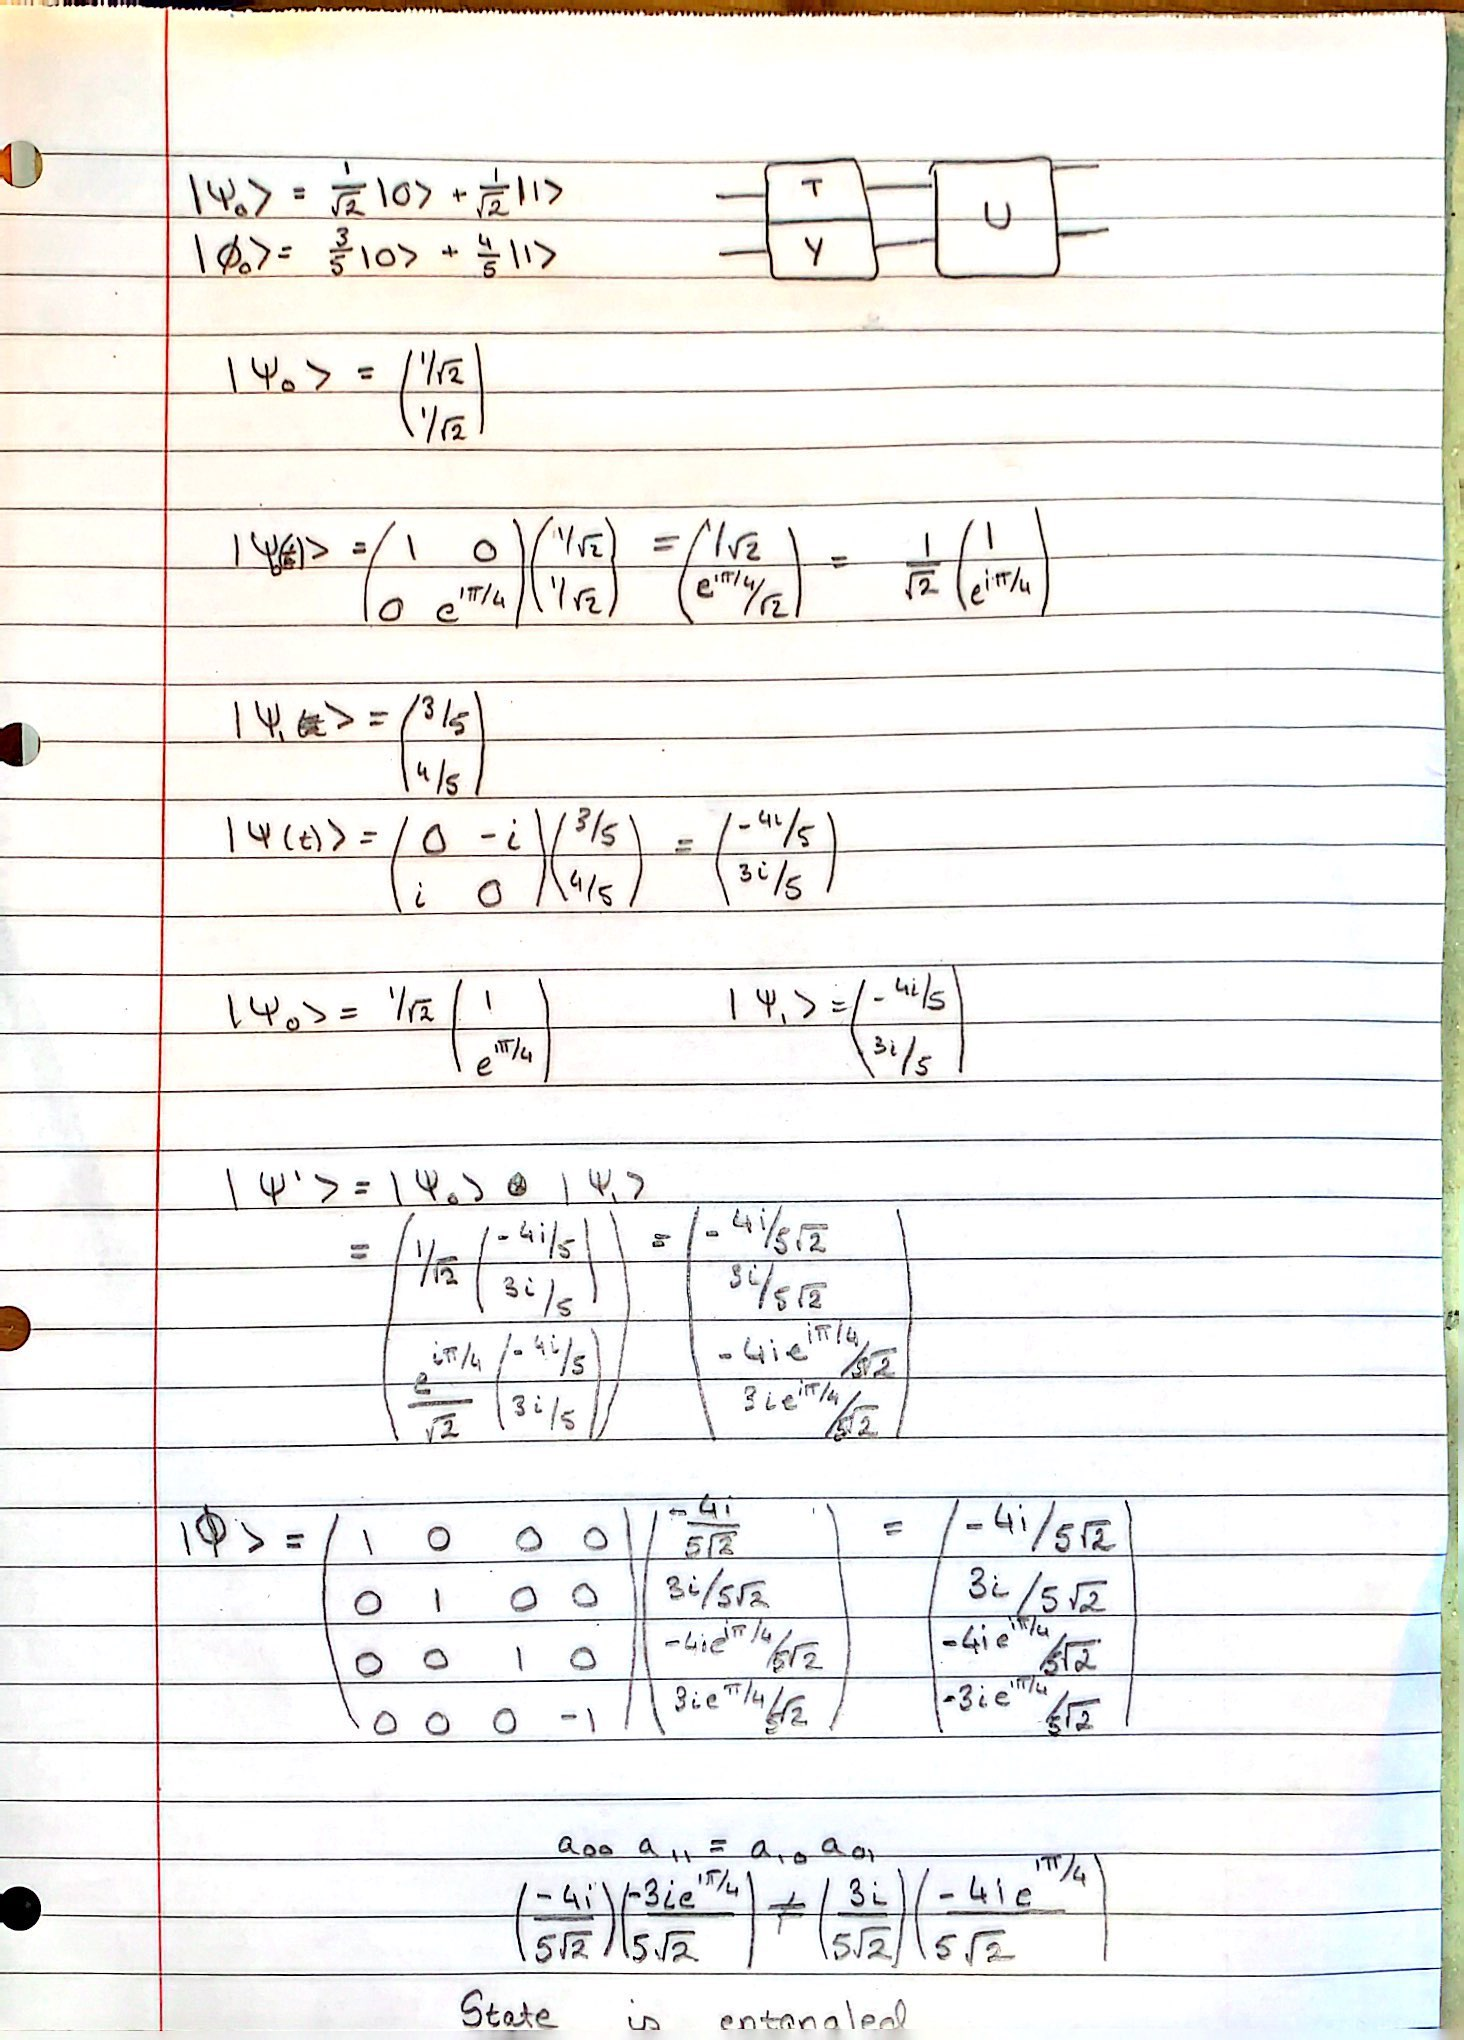

## Question 2 Continued

The probability of finding the second qubit in state 1 is 9/25, as shown:

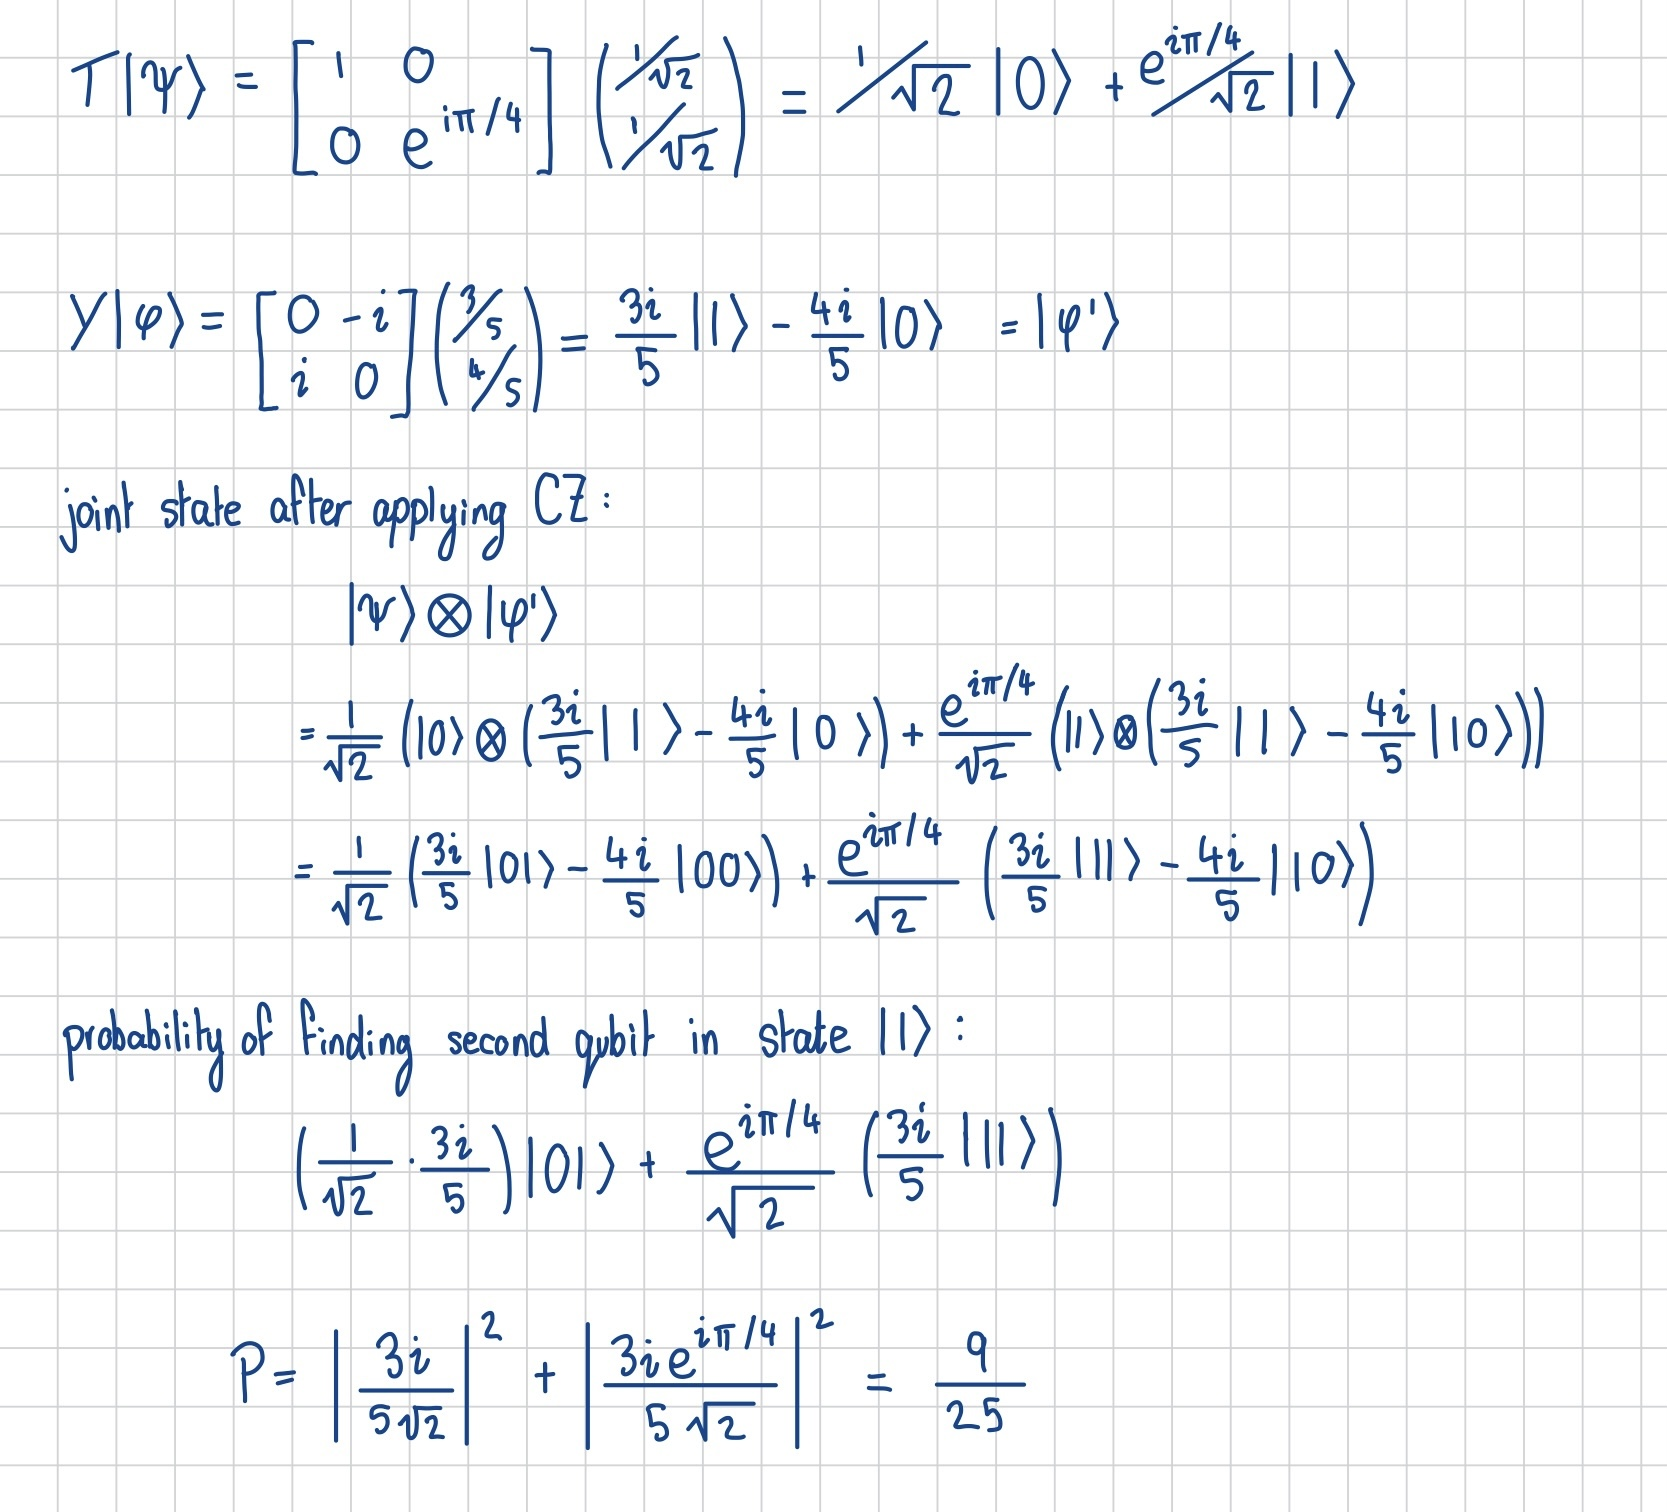